**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *


In [2]:
%%capture
ana_inf = InflationrateAnalysis('RQ_Inflationrate')

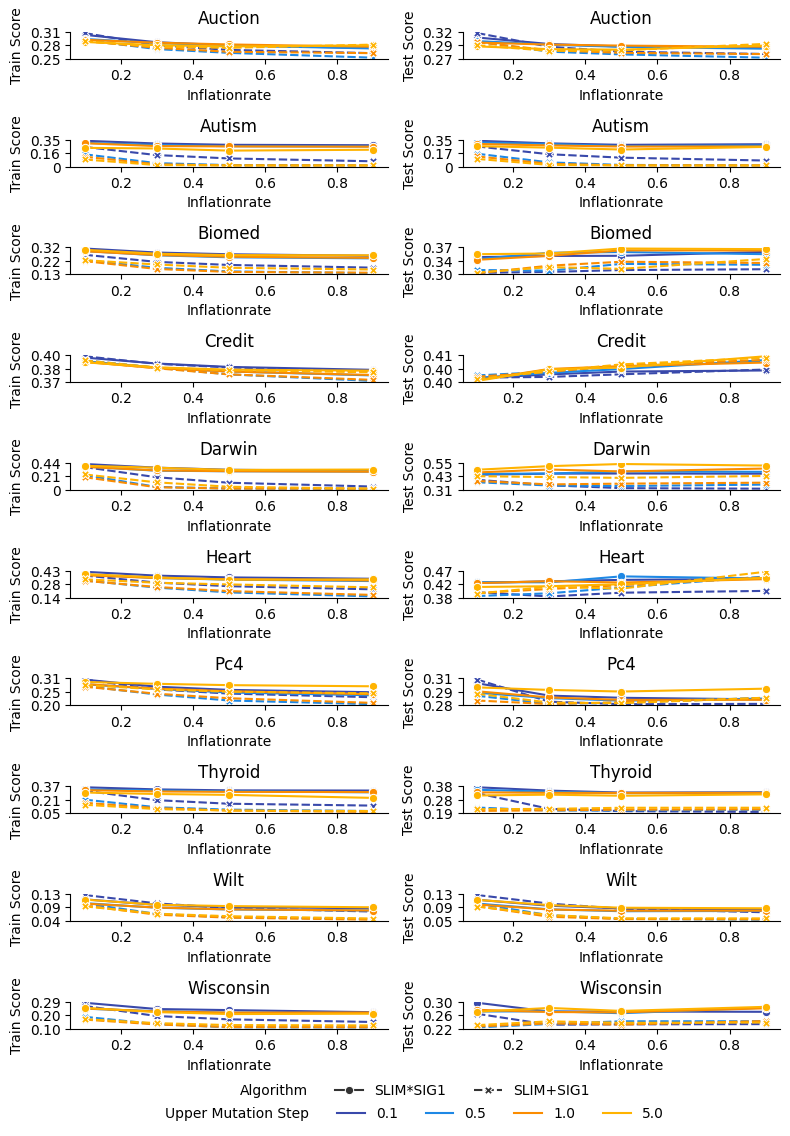

In [3]:
ana_inf.performance_by_p_inflate_plot[0]

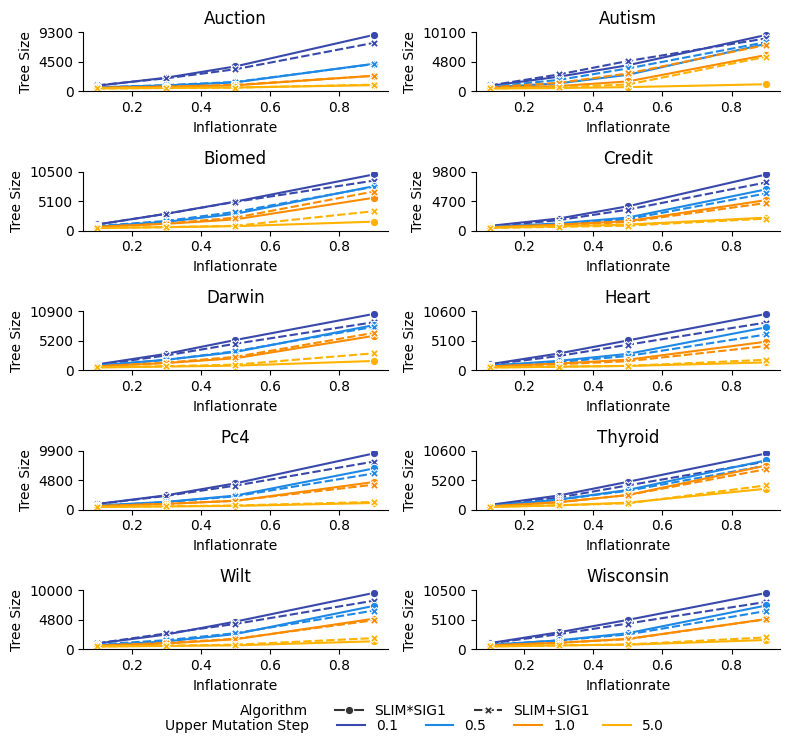

In [4]:
ana_inf.tree_size_by_p_inflate_plot[0]

In [5]:
ana_inf.tradeoff_table

Dataset    Version Inflationrate      Upper MS         RMSE          \
                                     R    T        R    T       R       T   
0     Auction  SLIM*SIG1           0.5  0.5      5.0  5.0  0.2866  0.2866   
1     Auction  SLIM+SIG1           0.9  0.5      0.5  1.0  0.2730  0.2812   
2      Autism  SLIM*SIG1           0.5  0.5      5.0  5.0  0.2149  0.2149   
3      Autism  SLIM+SIG1           0.9  0.3      5.0  5.0  0.0000  0.0070   
4      Biomed  SLIM*SIG1           0.1  0.1      1.0  1.0  0.3391  0.3391   
5      Biomed  SLIM+SIG1           0.1  0.1      1.0  1.0  0.3036  0.3036   
6      Credit  SLIM*SIG1           0.1  0.1      5.0  5.0  0.3960  0.3960   
7      Credit  SLIM+SIG1           0.1  0.1      5.0  5.0  0.3969  0.3969   
8      Darwin  SLIM*SIG1           0.1  0.1      0.1  0.1  0.4458  0.4458   
9      Darwin  SLIM+SIG1           0.9  0.3      0.1  0.5  0.3195  0.3481   
10      Heart  SLIM*SIG1           0.1  0.1      5.0  5.0  0.4116  0.4116   
11      Heart  SLIM+SIG1           0.3  0.1      0.1  0.5  0.3807  0.3820   
12        Pc4  SLIM*SIG1           0.5  0.5      0.5  1.0  0.2815  0.2825   
13        Pc4  SLIM+SIG1           0.5  0.5      0.1  5.0  0.2772  0.2784   
14    Thyroid  SLIM*SIG1           0.5  0.1      5.0  5.0  0.3111  0.3128   
15    Thyroid  SLIM+SIG1           0.9  0.1      0.1  1.0  0.2011  0.2078   
16       Wilt  SLIM*SIG1           0.5  0.3      0.5  1.0  0.0802  0.0853   
17       Wilt  SLIM+SIG1           0.9  0.5      0.5  5.0  0.0545  0.0587   
18  Wisconsin  SLIM*SIG1           0.5  0.1      0.5  5.0  0.2655  0.2701   
19  Wisconsin  SLIM+SIG1           0.1  0.1      0.5  0.5  0.2221  0.2221   

   RMSE % Tree Size         Tree Size %  
                  R       T              
0   +0.0%     232.5   232.5        0.0%  
1   +3.0%    4066.5   654.5      -83.9%  
2   +0.0%     344.0   344.0        0.0%  
3   +inf%    5731.5   319.0      -94.4%  
4   +0.0%     346.5   346.5        0.0%  
5   +0.0%     327.0   327.0        0.0%  
6   +0.0%     158.5   158.5        0.0%  
7   +0.0%     114.5   114.5        0.0%  
8   +0.0%     713.5   713.5        0.0%  
9   +9.0%    8771.0  1587.0      -81.9%  
10  +0.0%     102.5   102.5        0.0%  
11  +0.3%    2255.0   386.5      -82.9%  
12  +0.4%    2080.5  1155.0      -44.5%  
13  +0.4%    3831.0   345.0      -91.0%  
14  +0.5%     982.0   174.0      -82.3%  
15  +3.4%    8634.5   297.5      -96.6%  
16  +6.4%    2294.5   629.0      -72.6%  
17  +7.6%    6447.5   413.0      -93.6%  
18  +1.7%    2582.0   122.0      -95.3%  
19  +0.0%     452.0   452.0        0.0%

In [6]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.7326313084792209

In [7]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split

# Features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']
X['comb'] = X['config.p_inflate'] * X['config.ms_upper']
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# --- Linear Model ---
model_linear = sm.OLS(y_train, X_train_const).fit()
y_pred_linear = model_linear.predict(X_test_const)
r2_linear = model_linear.rsquared  # training R²

print("\n=== Linear Model Summary ===")
print(model_linear.summary())
print(f"\nLinear Model R² on test set: {r2_linear:.4f}")
# --- Exponential Model (log-transformed y) ---
log_y_train = np.log(y_train)
model_exp = sm.OLS(log_y_train, X_train_const).fit()
log_y_pred_exp = model_exp.predict(X_test_const)
y_pred_exp = np.exp(log_y_pred_exp)
r2_exp = 1 - np.sum((y_test - y_pred_exp)**2) / np.sum((y_test - np.mean(y_test))**2)

print("\n=== Exponential Model Summary ===")
print(model_exp.summary())
print(f"\nExponential Model R² on test set: {r2_exp:.4f}")


=== Linear Model Summary ===
                            OLS Regression Results                            
Dep. Variable:            nodes_count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 1.244e+04
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:30:16   Log-Likelihood:                -64815.
No. Observations:                7680   AIC:                         1.296e+05
Df Residuals:                    7676   BIC:                         1.297e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

C:\Users\leond\AppData\Local\Temp\ipykernel_12900\2780955753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['comb'] = X['config.p_inflate'] * X['config.ms_upper']


In [8]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Robust model (Huber Regression)
hub_reg = HuberRegressor()
hub_reg.fit(X_train, y_train)

# Predictions
y_pred_hub = hub_reg.predict(X_test)

# R^2 score
r2_hub = r2_score(y_test, y_pred_hub)

print(f"Robust Regression (Huber) R²: {r2_hub:.4f}")


Robust Regression (Huber) R²: 0.7234


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper', 'dataset', 'algorithm']]
X = pd.get_dummies(X, columns=['dataset', 'algorithm'], prefix='dataset', drop_first=True)
y = ana_inf.results['nodes_count']

# Log-transform the target variable
log_y = np.log(y)

# Train-test split (80/20)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, log_y, test_size=0.2, random_state=42)

# Fit linear model on log-transformed y
lr = LinearRegression()
lr.fit(X_train, y_train_log)

# Predict log(y) and exponentiate to get predictions in original scale
log_y_pred_test = lr.predict(X_test)
y_pred_test = np.exp(log_y_pred_test)
y_test_original = np.exp(y_test_log)

# R² score on original scale
r2 = r2_score(y_test_original, y_pred_test)
print("Exponential model R² (test set):", r2)


Exponential model R² (test set): 0.8539354786944664


In [10]:
lr.coef_, lr.intercept_

(array([ 3.39811959, -0.34027206,  0.63227872,  0.71391231,  0.42834596,
         0.77902854,  0.54806165,  0.31688752,  0.76497657,  0.37535226,
         0.64131254,  0.03241688]),
 5.52873939191568)

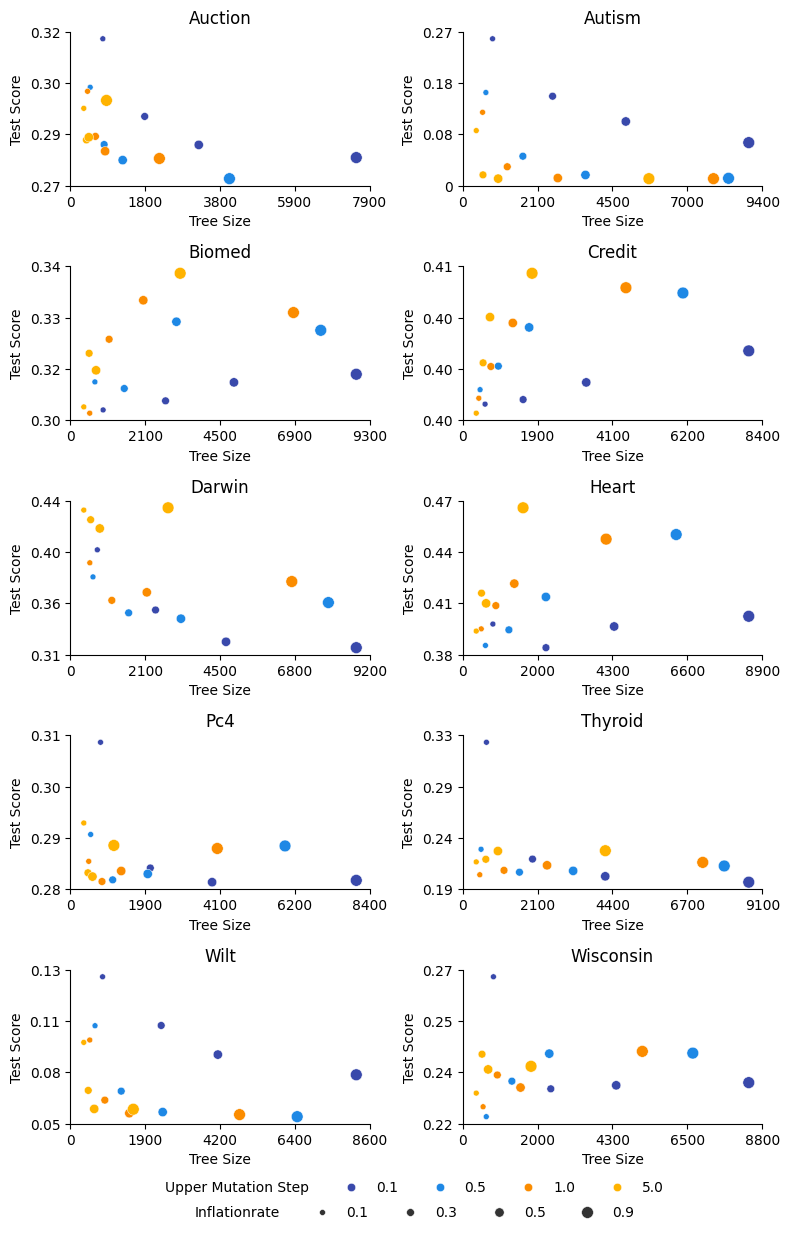

In [11]:
ana_inf.performance_complexity_tradeoff_plussig1_plot[0]

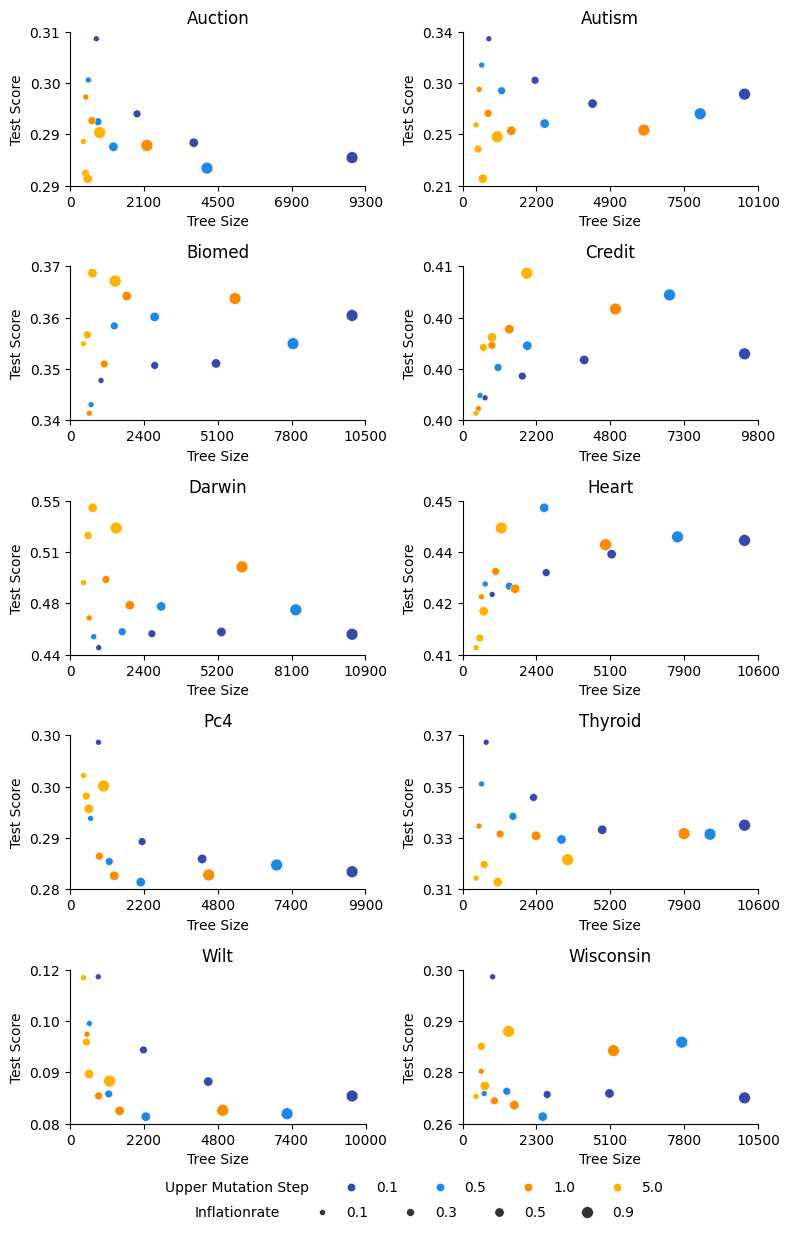

In [12]:
ana_inf.performance_complexity_tradeoff_mulsig1_plot[0]

In [13]:
best = get_best_config_performance_by_p_inflate_and_ms_upper(ana_inf.results)
best_perf = pd.merge(best, ana_inf.results_median[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset', 'algorithm', 'test.rmse', 'nodes_count']], on=['config_id', 'dataset'], how='left')
best_perf = best_perf[['dataset', 'algorithm', 'config.p_inflate', 'config.ms_upper', 'test.rmse', 'nodes_count']].copy()
best_perf['test.rmse'] = best_perf['test.rmse'].round(5)
best_perf

,dataset,algorithm,config.p_inflate,config.ms_upper,test.rmse,nodes_count
0,Auction,SLIM*SIG1,0.5,5.0,0.28663,232.5
1,Auction,SLIM+SIG1,0.9,0.5,0.27301,4066.5
2,Autism,SLIM*SIG1,0.5,5.0,0.21489,344.0
3,Autism,SLIM+SIG1,0.9,5.0,0.00000,5731.5
4,Biomed,SLIM*SIG1,0.1,1.0,0.33911,346.5
5,Biomed,SLIM+SIG1,0.1,1.0,0.30363,327.0
6,Credit,SLIM*SIG1,0.1,5.0,0.39599,158.5
7,Credit,SLIM+SIG1,0.1,5.0,0.39692,114.5
8,Darwin,SLIM*SIG1,0.1,0.1,0.44576,713.5
9,Darwin,SLIM+SIG1,0.9,0.1,0.31948,8771.0


In [14]:
best_trade = ana_inf.best_config_results_median[['dataset', 'algorithm', 'config.p_inflate', 'config.ms_upper', 'test.rmse',  'nodes_count']].copy()

best_trade['test.rmse'] = best_trade['test.rmse'].round(5)
best_trade

,dataset,algorithm,config.p_inflate,config.ms_upper,test.rmse,nodes_count
0,Auction,SLIM*SIG1,0.5,5.0,0.28663,232.5
1,Auction,SLIM+SIG1,0.5,1.0,0.28120,654.5
2,Autism,SLIM*SIG1,0.5,5.0,0.21489,344.0
3,Autism,SLIM+SIG1,0.3,5.0,0.00697,319.0
4,Biomed,SLIM*SIG1,0.1,1.0,0.33911,346.5
5,Biomed,SLIM+SIG1,0.1,1.0,0.30363,327.0
6,Credit,SLIM*SIG1,0.1,5.0,0.39599,158.5
7,Credit,SLIM+SIG1,0.1,5.0,0.39692,114.5
8,Darwin,SLIM*SIG1,0.1,0.1,0.44576,713.5
9,Darwin,SLIM+SIG1,0.3,0.5,0.34810,1587.0


In [15]:
best = pd.merge(best_perf, best_trade,  on=['dataset', 'algorithm'], how='left')
best['rmse_percentage'] = ((best['test.rmse_y'] - best['test.rmse_x']) / best['test.rmse_x']) * 100
best['rmse_percentage'] = '+' + best['rmse_percentage'].round(3).astype('str') + '%'

best['nodes_count_percentage'] = (best['nodes_count_y'] -best['nodes_count_x'] ) / best['nodes_count_x'] * 100
best['nodes_count_percentage'] = best['nodes_count_percentage'].round(3).astype('str') + '%'


best

,dataset,algorithm,config.p_inflate_x,config.ms_upper_x,test.rmse_x,nodes_count_x,config.p_inflate_y,config.ms_upper_y,test.rmse_y,nodes_count_y,rmse_percentage,nodes_count_percentage
0,Auction,SLIM*SIG1,0.5,5.0,0.28663,232.5,0.5,5.0,0.28663,232.5,+0.0%,0.0%
1,Auction,SLIM+SIG1,0.9,0.5,0.27301,4066.5,0.5,1.0,0.28120,654.5,+3.0%,-83.905%
2,Autism,SLIM*SIG1,0.5,5.0,0.21489,344.0,0.5,5.0,0.21489,344.0,+0.0%,0.0%
3,Autism,SLIM+SIG1,0.9,5.0,0.00000,5731.5,0.3,5.0,0.00697,319.0,+inf%,-94.434%
4,Biomed,SLIM*SIG1,0.1,1.0,0.33911,346.5,0.1,1.0,0.33911,346.5,+0.0%,0.0%
5,Biomed,SLIM+SIG1,0.1,1.0,0.30363,327.0,0.1,1.0,0.30363,327.0,+0.0%,0.0%
6,Credit,SLIM*SIG1,0.1,5.0,0.39599,158.5,0.1,5.0,0.39599,158.5,+0.0%,0.0%
7,Credit,SLIM+SIG1,0.1,5.0,0.39692,114.5,0.1,5.0,0.39692,114.5,+0.0%,0.0%
8,Darwin,SLIM*SIG1,0.1,0.1,0.44576,713.5,0.1,0.1,0.44576,713.5,+0.0%,0.0%
9,Darwin,SLIM+SIG1,0.9,0.1,0.31948,8771.0,0.3,0.5,0.34810,1587.0,+8.958%,-81.906%


In [16]:
# Keep dataset and algorithm first
best = best[[
    'dataset', 'algorithm',
    'config.p_inflate_x', 'config.p_inflate_y',
    'config.ms_upper_x', 'config.ms_upper_y',
    'test.rmse_x', 'test.rmse_y',
    'nodes_count_x', 'nodes_count_y',
    'rmse_percentage', 'nodes_count_percentage'
]]

# Assign MultiIndex to all except 'dataset' and 'algorithm'
multi_cols = pd.MultiIndex.from_tuples([
    ('dataset', ''), ('algorithm', ''),
    ('config.p_inflate', ' RMSE'), ('config.p_inflate', ' Tradeoff'),
    ('config.ms_upper', ' RMSE'), ('config.ms_upper', ' Tradeoff'),
    ('test.rmse', ' RMSE'), ('test.rmse', ' Tradeoff'),
    ('nodes_count', ' RMSE'), ('nodes_count', ' Tradeoff'),
    ('rmse_percentage', ''), ('nodes_count_percentage', '')
])

best.columns = multi_cols

best


dataset  algorithm config.p_inflate           config.ms_upper            \
                                     RMSE  Tradeoff            RMSE  Tradeoff   
0     Auction  SLIM*SIG1              0.5       0.5             5.0       5.0   
1     Auction  SLIM+SIG1              0.9       0.5             0.5       1.0   
2      Autism  SLIM*SIG1              0.5       0.5             5.0       5.0   
3      Autism  SLIM+SIG1              0.9       0.3             5.0       5.0   
4      Biomed  SLIM*SIG1              0.1       0.1             1.0       1.0   
5      Biomed  SLIM+SIG1              0.1       0.1             1.0       1.0   
6      Credit  SLIM*SIG1              0.1       0.1             5.0       5.0   
7      Credit  SLIM+SIG1              0.1       0.1             5.0       5.0   
8      Darwin  SLIM*SIG1              0.1       0.1             0.1       0.1   
9      Darwin  SLIM+SIG1              0.9       0.3             0.1       0.5   
10      Heart  SLIM*SIG1              0.1       0.1             5.0       5.0   
11      Heart  SLIM+SIG1              0.3       0.1             0.1       0.5   
12        Pc4  SLIM*SIG1              0.5       0.5             0.5       1.0   
13        Pc4  SLIM+SIG1              0.5       0.5             0.1       5.0   
14    Thyroid  SLIM*SIG1              0.5       0.1             5.0       5.0   
15    Thyroid  SLIM+SIG1              0.9       0.1             0.1       1.0   
16       Wilt  SLIM*SIG1              0.5       0.3             0.5       1.0   
17       Wilt  SLIM+SIG1              0.9       0.5             0.5       5.0   
18  Wisconsin  SLIM*SIG1              0.5       0.1             0.5       5.0   
19  Wisconsin  SLIM+SIG1              0.1       0.1             0.5       0.5   

   test.rmse           nodes_count           rmse_percentage  \
        RMSE  Tradeoff        RMSE  Tradeoff                   
0    0.28663   0.28663       232.5     232.5           +0.0%   
1    0.27301   0.28120      4066.5     654.5           +3.0%   
2    0.21489   0.21489       344.0     344.0           +0.0%   
3    0.00000   0.00697      5731.5     319.0           +inf%   
4    0.33911   0.33911       346.5     346.5           +0.0%   
5    0.30363   0.30363       327.0     327.0           +0.0%   
6    0.39599   0.39599       158.5     158.5           +0.0%   
7    0.39692   0.39692       114.5     114.5           +0.0%   
8    0.44576   0.44576       713.5     713.5           +0.0%   
9    0.31948   0.34810      8771.0    1587.0         +8.958%   
10   0.41155   0.41155       102.5     102.5           +0.0%   
11   0.38069   0.38197      2255.0     386.5         +0.336%   
12   0.28151   0.28251      2080.5    1155.0         +0.355%   
13   0.27719   0.27841      3831.0     345.0          +0.44%   
14   0.31115   0.31280       982.0     174.0          +0.53%   
15   0.20106   0.20783      8634.5     297.5         +3.367%   
16   0.08019   0.08534      2294.5     629.0         +6.422%   
17   0.05453   0.05867      6447.5     413.0         +7.592%   
18   0.26549   0.27010      2582.0     122.0         +1.736%   
19   0.22210   0.22210       452.0     452.0           +0.0%   

   nodes_count_percentage  
                           
0                    0.0%  
1                -83.905%  
2                    0.0%  
3                -94.434%  
4                    0.0%  
5                    0.0%  
6                    0.0%  
7                    0.0%  
8                    0.0%  
9                -81.906%  
10                   0.0%  
11                -82.86%  
12               -44.484%  
13               -90.995%  
14               -82.281%  
15               -96.555%  
16               -72.587%  
17               -93.594%  
18               -95.275%  
19                   0.0%

In [17]:
best.rename(columns={'algorithm': 'Version',
                     'config.p_inflate': 'Inflationrate',
                        'config.ms_upper': 'Upper MS',
                        'test.rmse': 'RMSE',
                        'nodes_count': 'Tree Size',
                        'rmse_percentage': 'RMSE %',
                        'nodes_count_percentage': 'Tree Size %'
                     }, inplace=True)
best

dataset    Version Inflationrate           Upper MS               RMSE  \
                                  RMSE  Tradeoff     RMSE  Tradeoff     RMSE   
0     Auction  SLIM*SIG1           0.5       0.5      5.0       5.0  0.28663   
1     Auction  SLIM+SIG1           0.9       0.5      0.5       1.0  0.27301   
2      Autism  SLIM*SIG1           0.5       0.5      5.0       5.0  0.21489   
3      Autism  SLIM+SIG1           0.9       0.3      5.0       5.0  0.00000   
4      Biomed  SLIM*SIG1           0.1       0.1      1.0       1.0  0.33911   
5      Biomed  SLIM+SIG1           0.1       0.1      1.0       1.0  0.30363   
6      Credit  SLIM*SIG1           0.1       0.1      5.0       5.0  0.39599   
7      Credit  SLIM+SIG1           0.1       0.1      5.0       5.0  0.39692   
8      Darwin  SLIM*SIG1           0.1       0.1      0.1       0.1  0.44576   
9      Darwin  SLIM+SIG1           0.9       0.3      0.1       0.5  0.31948   
10      Heart  SLIM*SIG1           0.1       0.1      5.0       5.0  0.41155   
11      Heart  SLIM+SIG1           0.3       0.1      0.1       0.5  0.38069   
12        Pc4  SLIM*SIG1           0.5       0.5      0.5       1.0  0.28151   
13        Pc4  SLIM+SIG1           0.5       0.5      0.1       5.0  0.27719   
14    Thyroid  SLIM*SIG1           0.5       0.1      5.0       5.0  0.31115   
15    Thyroid  SLIM+SIG1           0.9       0.1      0.1       1.0  0.20106   
16       Wilt  SLIM*SIG1           0.5       0.3      0.5       1.0  0.08019   
17       Wilt  SLIM+SIG1           0.9       0.5      0.5       5.0  0.05453   
18  Wisconsin  SLIM*SIG1           0.5       0.1      0.5       5.0  0.26549   
19  Wisconsin  SLIM+SIG1           0.1       0.1      0.5       0.5  0.22210   

             Tree Size             RMSE % Tree Size %  
    Tradeoff      RMSE  Tradeoff                       
0    0.28663     232.5     232.5    +0.0%        0.0%  
1    0.28120    4066.5     654.5    +3.0%    -83.905%  
2    0.21489     344.0     344.0    +0.0%        0.0%  
3    0.00697    5731.5     319.0    +inf%    -94.434%  
4    0.33911     346.5     346.5    +0.0%        0.0%  
5    0.30363     327.0     327.0    +0.0%        0.0%  
6    0.39599     158.5     158.5    +0.0%        0.0%  
7    0.39692     114.5     114.5    +0.0%        0.0%  
8    0.44576     713.5     713.5    +0.0%        0.0%  
9    0.34810    8771.0    1587.0  +8.958%    -81.906%  
10   0.41155     102.5     102.5    +0.0%        0.0%  
11   0.38197    2255.0     386.5  +0.336%     -82.86%  
12   0.28251    2080.5    1155.0  +0.355%    -44.484%  
13   0.27841    3831.0     345.0   +0.44%    -90.995%  
14   0.31280     982.0     174.0   +0.53%    -82.281%  
15   0.20783    8634.5     297.5  +3.367%    -96.555%  
16   0.08534    2294.5     629.0  +6.422%    -72.587%  
17   0.05867    6447.5     413.0  +7.592%    -93.594%  
18   0.27010    2582.0     122.0  +1.736%    -95.275%  
19   0.22210     452.0     452.0    +0.0%        0.0%

In [18]:
get_min_euclidian_distance(ana_inf.results)

c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experiments\analysis.py:316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5# 2*
c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experiments\analysis.py:316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5# 2*
c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\

,config_id,run_id,nodes_count,algorithm,scaling,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,...,train.recall,test.rmse,test.wrmse,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset,euclidian_distance
0,28,15,0.021274,SLIM*SIG1,True,False,100,1000,True,1,...,0.185792,0.000000,0.464421,0.895595,0.879984,0.333333,0.941176,0.202532,Auction,0.030086
1,39,20,0.031110,SLIM+SIG1,True,False,100,1000,True,1,...,0.355191,0.174997,0.490116,0.920065,0.796899,0.581197,0.894737,0.430380,Auction,0.180442
2,32,3,0.003722,SLIM*SIG1,True,False,100,1000,True,1,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Autism,0.005263
3,40,6,0.012155,SLIM+SIG1,True,False,100,1000,True,1,...,1.000000,0.015703,0.006531,1.000000,1.000000,1.000000,1.000000,1.000000,Autism,0.023283
4,24,10,0.019813,SLIM*SIG1,True,False,100,1000,True,1,...,0.730769,0.068971,0.277580,0.857143,0.957609,0.800000,0.818182,0.782609,Biomed,0.074446
5,34,10,0.049092,SLIM+SIG1,True,False,100,1000,True,1,...,0.807692,0.175314,0.215118,0.952381,0.986957,0.933333,0.954545,0.913043,Biomed,0.188560
6,20,14,0.000000,SLIM*SIG1,True,False,100,1000,True,1,...,0.000000,0.000286,0.563677,0.798817,0.719444,0.000000,0.000000,0.000000,Credit,0.000286
7,36,14,0.002665,SLIM+SIG1,True,False,100,1000,True,1,...,0.006369,0.000000,0.551533,0.798817,0.701580,0.000000,0.000000,0.000000,Credit,0.003768
8,20,24,0.002460,SLIM*SIG1,True,False,100,1000,True,1,...,0.779661,0.000000,0.369515,0.754717,0.880342,0.771930,0.709677,0.846154,Darwin,0.003478
9,38,24,0.160823,SLIM+SIG1,True,False,100,1000,True,1,...,1.000000,0.000000,0.206308,0.924528,0.988604,0.925926,0.892857,0.961538,Darwin,0.227437


In [19]:

X = ana_inf.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

KeyError: "['dataset_name', 'name'] not in index"

(array([7003.59709821, -542.20042595]), 137.87880549860574)